# Usage

This notebook contains all of the invocations of `pip` necessary to install the packages so there are no additional installation steps.  It also contains code that downloads the images used so there are no additional configuration steps.

In [1]:
# Install necessary packages.
%pip install deepface
%pip install matplotlib
%pip install Pillow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import all packages.
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import random
import zipfile
from PIL import Image
from deepface import DeepFace
from urllib.request import urlopen

In [3]:
# Download and extract the image data.  This will take a while since the file is 384MB.
images_link = 'drive.usercontent.google.com/download?id=17UoqIa5vzUVglQccnSDtA3w6ZYggrHRh&export=download&authuser=0&confirm=t&uuid=3309f650-a26e-403d-aff8-507baf34ba5f&at=APZUnTWv1AJHw3CPqc1ZYVTcxLyZ%3A1704669455481'
os.makedirs('data', exist_ok=True)
zip_file_path = os.path.join('data', 'images.zip')
with urlopen(images_link) as response:
    with open(zip_file_path, 'wb') as fout:
        fout.write(response.read())
with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    zip_file.extractall('data')

In [4]:
# Run the DeepFace package on a random set of images.  Use a fixed seed for reproducibility.
random.seed(999)
images_directory_path = os.path.join('data', 'Scraped-Dataset for GroupEmotion')
_, _, file_names = next(os.walk(images_directory_path))
selected_file_paths = [os.path.join(images_directory_path, file_names[random.randrange(len(file_names))]) for _ in range(9)]
def analyze(image_path: str) -> list[dict]:
    return DeepFace.analyze(image_path, actions=['emotion'], detector_backend='mtcnn', silent=True)
results = [(image_path, analyze(image_path)) for image_path in selected_file_paths]
results

2/2 [==============================] - 0s 8ms/step


[('data\\Scraped-Dataset for GroupEmotion\\b2bf3e47fce9460fb9189e16e5f9e732.jpg',
  [{'emotion': {'angry': 0.08891125908121467,
     'disgust': 1.0464457744774336e-06,
     'fear': 98.0361819267273,
     'happy': 0.6089039146900177,
     'sad': 0.298385857604444,
     'surprise': 0.445368280634284,
     'neutral': 0.5222541745752096},
    'dominant_emotion': 'fear',
    'region': {'x': 1876, 'y': 880, 'w': 103, 'h': 141},
    'face_confidence': 0.9999136924743652},
   {'emotion': {'angry': 0.00018131867136617075,
     'disgust': 3.124621048011811e-09,
     'fear': 4.347921907901764,
     'happy': 1.214760821312666,
     'sad': 38.27369511127472,
     'surprise': 0.001819918179535307,
     'neutral': 56.16161823272705},
    'dominant_emotion': 'neutral',
    'region': {'x': 459, 'y': 840, 'w': 97, 'h': 154},
    'face_confidence': 0.9997947812080383},
   {'emotion': {'angry': 4.935773462057114,
     'disgust': 0.010607129661366343,
     'fear': 3.6661215126514435,
     'happy': 0.424164

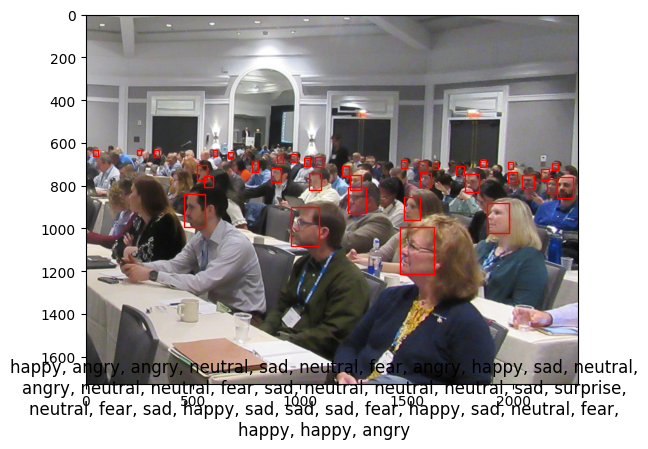

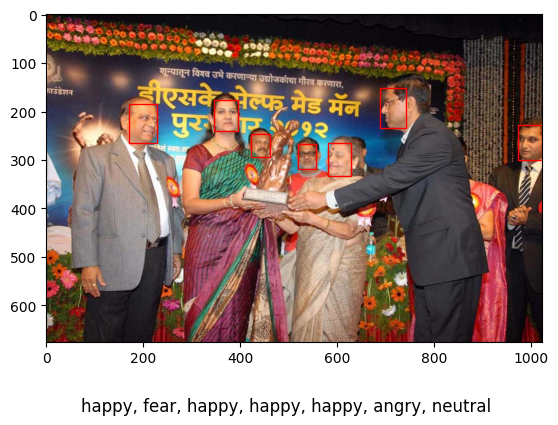

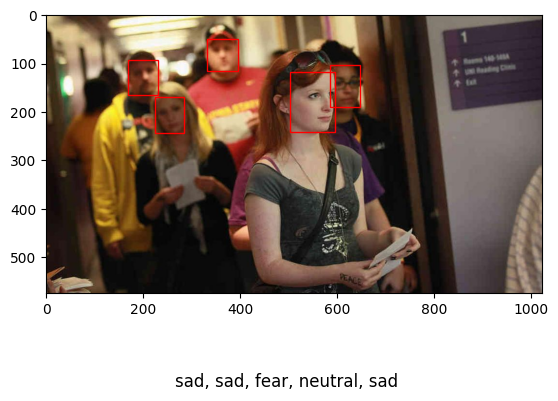

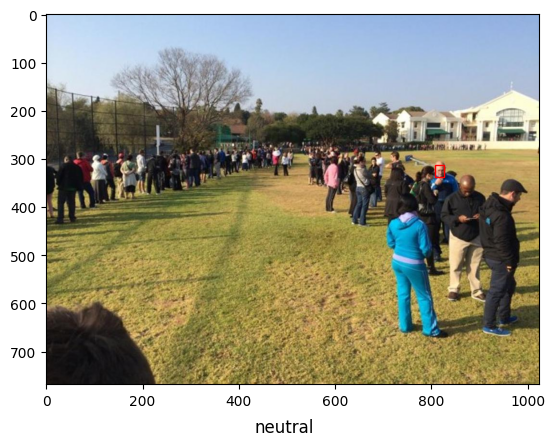

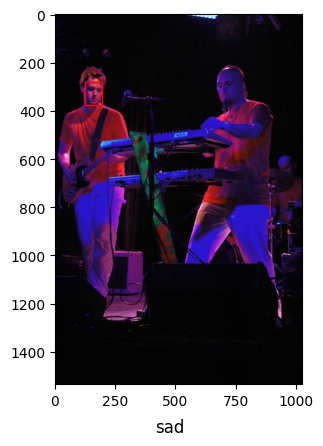

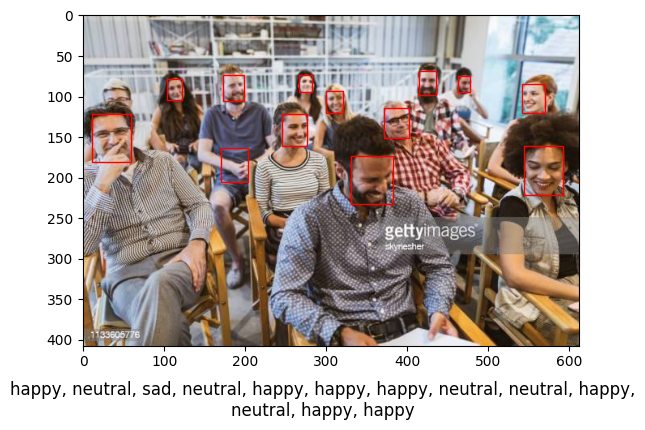

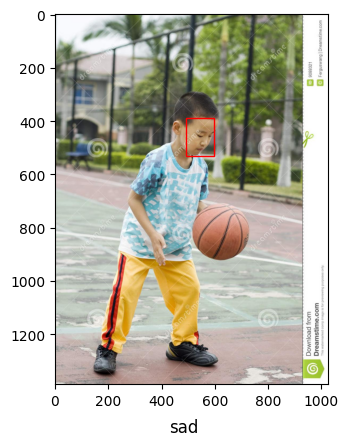

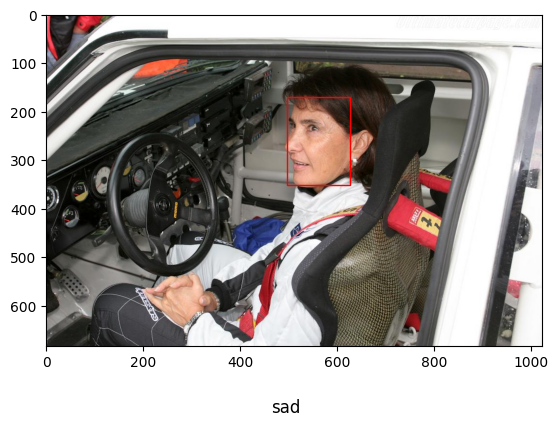

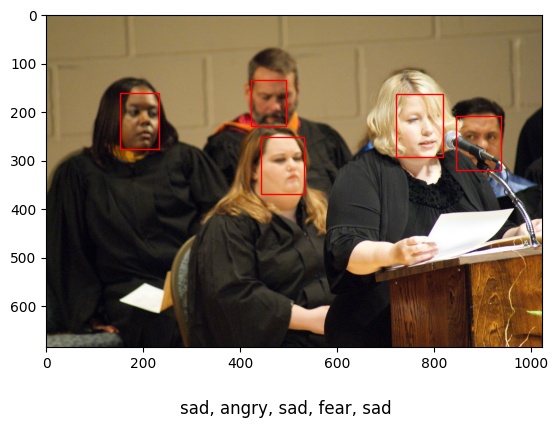

In [5]:
def display_result(image_path, image_results):
    image = Image.open(image_path)
    fig, ax = plt.subplots()
    ax.imshow(image)
    keys = ('x', 'y', 'w', 'h')
    captions = []
    for image_result in image_results:
        x, y, width, height = (image_result['region'][k] for k in keys)
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    l = sorted(image_results, key=lambda r: r['region']['x'])
    for image_result in l:
        captions.append(image_result['dominant_emotion'])
    caption = ', '.join(captions)
    fig.text(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()

# Display the face detection and emotion recognition results.
# The list of emotions is in the same order as the faces from left to right.
for image_path, image_results in results:
    display_result(image_path, image_results)